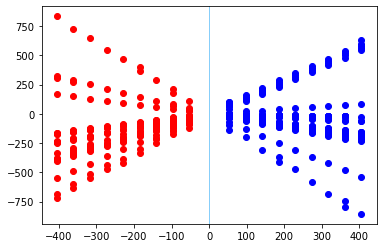

426

In [19]:
'''
Fit 3D lines to cylinders
'''

# YOUR CODE HERE

import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

    
def readData(filename):
    
    return np.loadtxt(filename, delimiter=',')
 
def runFit(infile, outfile):
    
    '''

    Parameters
    ----------
    inputfilename : string
        input data file name for fitting.
    outputfilename : string
        result storage file name.

    Returns
    -------
    counter : int
        number of successful fits; 100% would be twice the number
        of events (two lines per event).

    '''
    
    def fitLine(event):
        if len(event) < 7:
            return False, None

        x = event[2]
        y = event[4]
        sx = event[6]
        sy = event[5]

        ux = x / np.sqrt(x**2 + y**2)
        uy = y / np.sqrt(x**2 + y**2)

        D = np.abs((x * uy - y * ux)) - 1
        W = (sy * uy)**2 + (sx * ux)**2 + (sy * ux)**2 + (sx * uy)**2
        return D, W

    def storeResults(outfile, results):
        """Stores the line parameters in the given file"""
        np.savetxt(outfile, results)

    def plotEvent(event):
        """Plots the event data. Red dots for x < 0, blue dots for x >= 0"""
        x = event[:, 2]
        y = event[:, 4]
        left_x = []
        left_y = []
        right_x = []
        right_y = []
        for i in range(len(x)):
            if x[i] < 0:
                left_x.append(x[i])
                left_y.append(y[i])
            else:
                right_x.append(x[i])
                right_y.append(y[i])
        plt.scatter(left_x, left_y, color='r')
        plt.scatter(right_x, right_y, color='b')
        plt.axvline(x=0, color='#87CEFA', linewidth=1)
        theta = np.linspace(0, 2*np.pi, 100)
        plt.show()
        
        
    fulldata = readData(infile)
    
    counter = 0
    
    # YOUR CODE HERE
    results = []
    for event in fulldata:
        success, line_parameters = fitLine(event)
        if success:
            counter += 1
            results.append(np.array([line_parameters]))
    storeResults(outfile, results)
    plotEvent(fulldata)
    
    return counter


runFit('tendata.txt', 'results.txt')


In [ ]:
# test cell can't work since reading a file is called that you don't have. Consider it example code.
# main script
import time
start = time.process_time()
success = runFit("ringdata.txt.gz", "output.txt.gz")
stop = time.process_time()
print ("success: ", success)
print ("fit time: ", (stop-start))

# testing part
truthdata  = readData("ringtruth.txt")
outputdata = readData("output.txt.gz")

# test 1
nevents = int(outputdata[-1,0])
assert nevents == int(len(truthdata) / 2) ,'equality of data volume test failed.'

In [ ]:
# test 2: compare your fit results with the truth data and determine the fit efficiency.
# Again, can't run since you don't have the 1000 event data file for the assignment but
# may clarify what is meant by fit efficiency.
truthrow = 0
counter = 0
for evt in range(1,nevents+1):
    # select event number data
    evtdata = outputdata[outputdata[:,0]==evt]
    for i in range(2):
        # now check on values
        trueixy  = truthdata[truthrow, 0]
        trueslxy = truthdata[truthrow, 2]
        ixy  = evtdata[i, 2]
        slxy = evtdata[i, 4]
        errixy  = evtdata[i, 3]
        errslxy = evtdata[i, 5]
        # catch fit failed case
        if errixy==0.0 and errslxy==0.0:
            truthrow += 1 # next line
            continue # skip the rest below
        bool1 = trueixy <= ixy + errixy and trueixy >= ixy - errixy
        bool2 = trueslxy <= slxy + errslxy and trueslxy >= slxy - errslxy
        if bool1 and bool2:
            counter += 1
        else:
            print(bool1, bool2)
            print('True: ', trueixy, trueslxy)
            print('Fit 1: ', ixy, slxy)
            print('Error 1: ', errixy, errslxy)
        truthrow += 1 # next line
print('efficiency: ', counter/(2*nevents))
assert counter/(2*nevents)>=0.98, 'Less than 98% efficiency. Reduce marks'